<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. パターン認識って何？


## 1.1 パターン認識とは


パターン認識システムのデモを動かすために、[transformers](https://huggingface.co/docs/transformers/index) ライブラリをインストールします。

In [1]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.4 MB/s eta 0:00:00


### 画像認識の例

物体認識（[Imagenet 1000クラス](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)）を行う例を示します。


In [2]:
# サンプル画像を取得
!wget https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg

--2023-08-04 02:32:48--  https://github.com/opencv/opencv/raw/master/samples/data/fruits.jpg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg [following]
--2023-08-04 02:32:48--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82429 (80K) [image/jpeg]
Saving to: ‘fruits.jpg’

fruits.jpg          100%[===================>]  80.50K  --.-KB/s    in 0.007s  

2023-08-04 02:32:49 (11.3 MB/s) - ‘fruits.jpg’ saved [82429/82429]



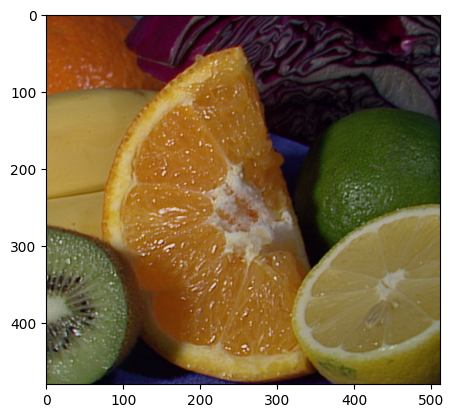

In [3]:
# ダウンロードした画像の表示
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('fruits.jpg')
plt.imshow(img)
plt.show()

transformersライブラリが提供する pipeline という機能を用いて、簡潔なコードで認識を行います。pipeline は認識に必要な処理を系列として内部で結合したもので、実行したい処理の名前と用いる認識用モデルを指定して、入力をファイルとして与えるだけで結果を出力してくれます。

ここでは Google の Vision Transformer (ViT) というモデルで物体認識を行います。

In [4]:
from transformers import pipeline

clf = pipeline("image-classification", "google/vit-base-patch16-224")
clf("fruits.jpg")

[{'score': 0.3236878216266632, 'label': 'lemon'},
 {'score': 0.3189966678619385, 'label': 'banana'},
 {'score': 0.30935826897621155, 'label': 'orange'},
 {'score': 0.022342318668961525, 'label': 'Granny Smith'},
 {'score': 0.006811176892369986, 'label': 'pineapple, ananas'}]

### 音声認識の例

日本語音声認識を行う例を示します。

In [5]:
# サンプル音声を取得
!wget https://github.com/kan-bayashi/asj-espnet2-tutorial/raw/master/static/audios/ja_sample.wav

--2023-08-04 02:35:58--  https://github.com/kan-bayashi/asj-espnet2-tutorial/raw/master/static/audios/ja_sample.wav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kan-bayashi/asj-espnet2-tutorial/master/static/audios/ja_sample.wav [following]
--2023-08-04 02:35:58--  https://raw.githubusercontent.com/kan-bayashi/asj-espnet2-tutorial/master/static/audios/ja_sample.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145244 (142K) [audio/wav]
Saving to: ‘ja_sample.wav’

ja_sample.wav       100%[===================>] 141.84K  --.-KB/s    in 0.02s   

2023-08-04 02:35:59 (8.31 MB/s) - ‘ja_sample.wav

In [6]:
# プレイボタンで音声を再生

import IPython.display
IPython.display.Audio("ja_sample.wav")

pipeline において、OpenAI の Whisper モデルを指定して音声認識を行います。ここでは処理を軽くするために [whisper-small](https://huggingface.co/openai/whisper-small) を選んでいますが、Whisper モデルはさまざまなサイズから選択することができます。

In [7]:
from transformers import pipeline

clf = pipeline("automatic-speech-recognition", "openai/whisper-small", generate_kwargs = {"task":"transcribe", "language":"<|ja|>"})
clf("ja_sample.wav")

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (448) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'text': '演奏会のキップは当事務所で販売しています'}

## 1.4 特徴抽出部


### irisデータで3dプロット

特徴抽出を行った結果として、複数の特徴値を並べた特徴ベクトルが得られます。特徴がうまく選択できていれば、同じクラスに属するデータの特徴ベクトルは特徴空間上でまとまりを形成しているはずです。

このことを具体的なデータで確認してみましょう。irisデータはアヤメの種類を識別するための、花びらの幅・長さ、萼の幅・長さからなる4次元データです。このデータから3次元を選び出し、特徴空間上にプロットして可視化してみます。

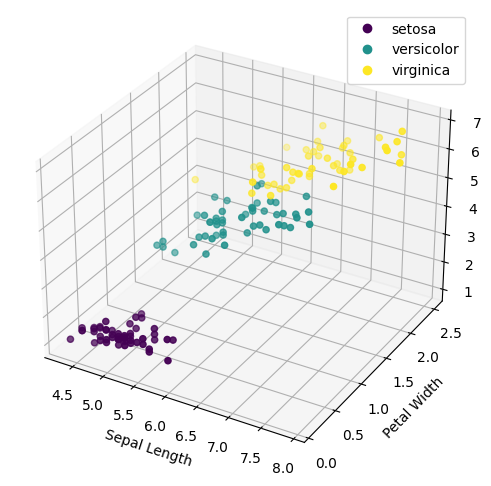

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# Iris データセットを読み込む
iris = sns.load_dataset('iris')

# ラベルエンコーダを作成し、'species'を数値に変換
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])

# 3Dプロットを作成
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# プロット（色情報を数値の形で指定）
scatter = ax.scatter(iris['sepal_length'], iris['petal_width'], iris['petal_length'],
                     c=iris['species'], cmap='viridis')

# ラベルの設定
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Petal Length') # z軸のラベル表示がうまくいかない

# レジェンドの追加
plt.legend(handles=scatter.legend_elements()[0], labels=list(le.classes_))
plt.show()

## 1.5 識別部と識別辞書



### 例題1.1

以下の図に示すプロトタイプと入力パターンを用いて、最近傍決定則による識別を行え。

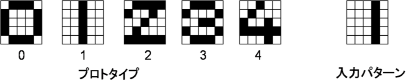

例題1.1の処理をPythonでコーディングせよ．


In [48]:
import numpy as np

proto = np.array(
    [[[0,1,1,1,0],
      [1,0,0,0,1],
      [1,0,0,0,1],
      [1,0,0,0,1],
      [0,1,1,1,0]],
     [[0,0,1,0,0],
      [0,0,1,0,0],
      [0,0,1,0,0],
      [0,0,1,0,0],
      [0,0,1,0,0]],
     [[0,1,1,1,1],
      [1,0,0,1,0],
      [0,0,1,0,0],
      [0,1,0,0,0],
      [1,1,1,1,1]],
     [[0,1,1,1,0],
      [1,0,0,0,1],
      [0,0,1,1,0],
      [1,0,0,0,1],
      [0,1,1,1,0]],
     [[0,0,1,0,0],
      [0,1,0,0,0],
      [1,0,0,1,0],
      [1,1,1,1,1],
      [0,0,0,1,0]]])
x = np.array(
     [[0,0,0,1,0],
      [0,0,0,1,0],
      [0,0,0,1,0],
      [0,0,0,1,0],
      [0,0,0,1,0]])

# 以下にxとproto[i]との距離を求めて最小値のインデックスを表示するコードを記述する


## 解答例

In [49]:
d = [np.linalg.norm(x - p) for p in proto]
print(f'result: {np.argmin(d)}')

result: 4
